In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import urllib
%matplotlib inline

In [21]:
path = r'../data'
all_files = glob.glob(path + "/*.xlsx")

li = []
for filename in all_files:
    df = pd.read_excel(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33328 entries, 0 to 33327
Data columns (total 7 columns):
make       33328 non-null object
model      33328 non-null object
trim       33328 non-null object
type       33328 non-null object
price      33328 non-null object
mileage    33328 non-null object
src        33328 non-null object
dtypes: object(7)
memory usage: 1.8+ MB


In [23]:
df.head()

,make,model,trim,type,price,mileage,src
0,x,x,x,x,x,x,x
1,2015 AUDI,A3,1.8T Premium Plus,convertible,"22,200","41,822 miles",//cdnblob.carvana.io/2000291164/post-large/nor...
2,2011 JAGUAR,XK,XKR,convertible,"34,300","47,179 miles",//cdnblob.carvana.io/2000287619/post-large/nor...
3,2017 MAZDA,MX-5 MIATA RF,Club,convertible,"25,700","6,445 miles",//cdnblob.carvana.io/2000282627/post-large/nor...
4,2016 BMW,4 SERIES,428i,convertible,"32,800","17,869 miles",//cdnblob.carvana.io/2000283685/post-large/nor...


In [24]:
df = df.drop(np.array(df[df.make == 'x'].index))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33309 entries, 1 to 33327
Data columns (total 7 columns):
make       33309 non-null object
model      33309 non-null object
trim       33309 non-null object
type       33309 non-null object
price      33309 non-null object
mileage    33309 non-null object
src        33309 non-null object
dtypes: object(7)
memory usage: 2.0+ MB


In [31]:
df['price'] = df['price'].apply(lambda x: int(x.replace(',','')))
df['mileage'] = df['mileage'].apply(lambda x: int(x.replace(',','').replace(' miles','')))
df['src'] = df['src'].apply(lambda x: x.lstrip('/'))

In [32]:
df.head()

,make,model,trim,type,price,mileage,src
1,2015 AUDI,A3,1.8T Premium Plus,convertible,22200,41822,cdnblob.carvana.io/2000291164/post-large/norma...
2,2011 JAGUAR,XK,XKR,convertible,34300,47179,cdnblob.carvana.io/2000287619/post-large/norma...
3,2017 MAZDA,MX-5 MIATA RF,Club,convertible,25700,6445,cdnblob.carvana.io/2000282627/post-large/norma...
4,2016 BMW,4 SERIES,428i,convertible,32800,17869,cdnblob.carvana.io/2000283685/post-large/norma...
5,2015 BMW,Z4,SDrive35i,convertible,32700,29380,cdnblob.carvana.io/2000277443/post-large/norma...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33309 entries, 1 to 33327
Data columns (total 7 columns):
make       33309 non-null object
model      33309 non-null object
trim       33309 non-null object
type       33309 non-null object
price      33309 non-null int64
mileage    33309 non-null int64
src        33309 non-null object
dtypes: int64(2), object(5)
memory usage: 2.0+ MB


In [62]:
all_cars = df.drop_duplicates()

In [63]:
all_cars['year'] = all_cars['make'].apply(lambda x: int(x.split()[0]))

/Users/alisoomar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
all_cars['make'] = all_cars['make'].apply(lambda x: x.split(' ', 1)[1])

/Users/alisoomar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [65]:
all_cars = all_cars.reset_index()
all_cars.drop(['index'],axis=1, inplace=True)

In [180]:
def is_valid_url(url):
    index = url.find('carvana')
    return index >= 0

In [181]:
invalid_urls = []
for i in range(len(all_cars.iloc[:]['src'])):
    if not is_valid_url(all_cars.iloc[i]['src']):
        invalid_urls.append(i)

In [184]:
all_cars.drop(invalid_urls, inplace=True)

In [189]:
all_cars = all_cars.reset_index()
all_cars.drop(['index'],axis=1, inplace=True)

In [84]:
all_cars.replace({'make': 'MERCEDES-BEN...'}, 'MERCEDES-BENZ',inplace=True)

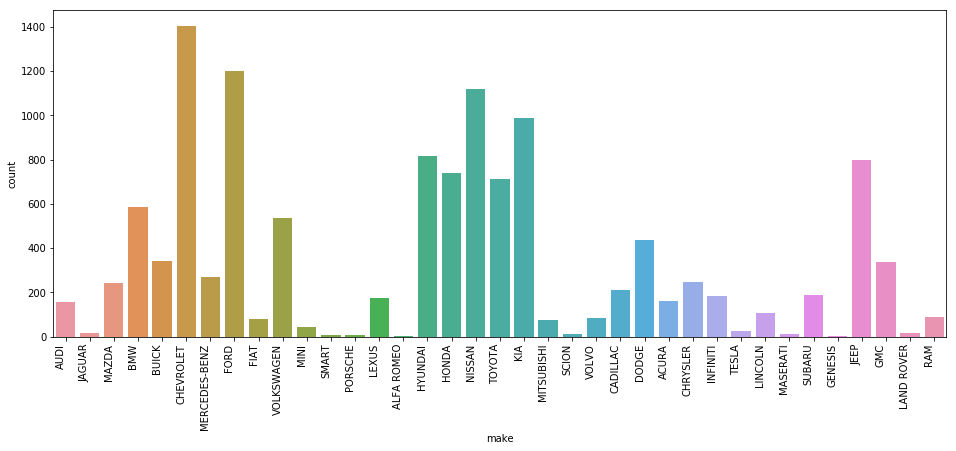

In [191]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x='make', data=all_cars)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

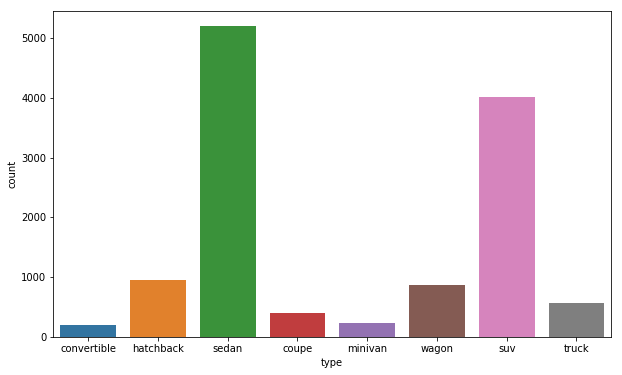

In [192]:
plt.figure(figsize=(10,6))
sns.countplot(x='type', data=all_cars)

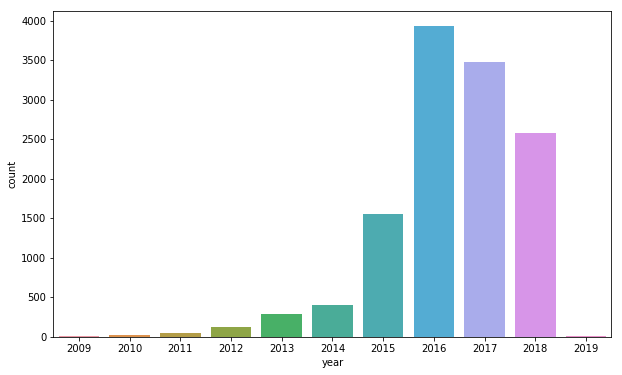

In [193]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=all_cars)

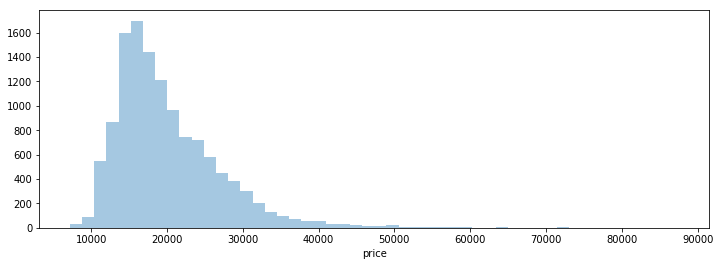

In [197]:
plt.figure(figsize=(12,4))
sns.distplot((all_cars['price']), kde=False)

In [210]:
def is_original(url):
    if url.find('.png') >= 0:
        return 'sample'
    else:
        return 'original'

originals = []    
for url in all_cars.iloc[:]['src']:
    originals.append(is_original(url))

In [224]:
all_cars['image-type'] = originals

In [229]:
all_cars.head()

,make,model,trim,type,price,mileage,src,year,image-type
0,AUDI,A3,1.8T Premium Plus,convertible,22200,41822,cdnblob.carvana.io/2000291164/post-large/norma...,2015,original
1,JAGUAR,XK,XKR,convertible,34300,47179,cdnblob.carvana.io/2000287619/post-large/norma...,2011,original
2,MAZDA,MX-5 MIATA RF,Club,convertible,25700,6445,cdnblob.carvana.io/2000282627/post-large/norma...,2017,original
3,BMW,4 SERIES,428i,convertible,32800,17869,cdnblob.carvana.io/2000283685/post-large/norma...,2016,original
4,BMW,Z4,SDrive35i,convertible,32700,29380,cdnblob.carvana.io/2000277443/post-large/norma...,2015,original


In [233]:
len(all_cars[all_cars['image-type'] == 'sample']) #There are 120 sample photos found in our data

120

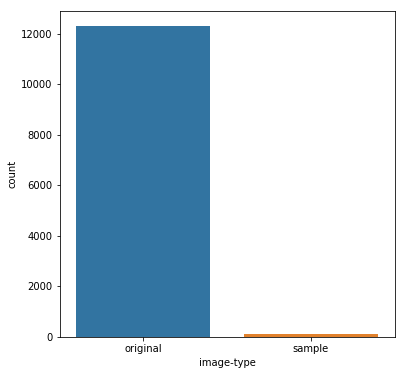

In [234]:
plt.figure(figsize=(6,6))
sns.countplot(x='image-type', data=all_cars)

In [235]:
all_cars.to_csv('../final_data.csv')

In [146]:
urllib.request.urlretrieve('https://' + all_cars.iloc[0]['src'], "../images/" + str(0) + ".jpg")

('../images/0.jpg', <http.client.HTTPMessage at 0x1a222b50f0>)

In [237]:
urls = all_cars.iloc[:]['src']
for i in range(len(urls)):
    urllib.request.urlretrieve('https://' + urls[i], "../images/" + str(i) + ".jpg")

In [240]:
all_cars.trim.nunique()

799